# Question 1

Occupations

In [4]:
#Import the libraries
import pandas as pd
import numpy as np

In [81]:
#Import the dataset from this address, Assign it to a variable called users
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

In [10]:
#Step4
OccMean = users.groupby('occupation').mean()

AgeAverage = users['age'].mean()

AgeAverage

34.05196182396607

In [9]:
#Step5
def convert_gender(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
    
users['Numeric_gender'] = users['gender'].apply(convert_gender)

MaleRatio = users.groupby('occupation').Numeric_gender.sum() / users.occupation.value_counts() 

MaleRatio.sort_values(ascending = False)  


doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [11]:
#Step6
# For each occupation, calculate the minimum and maximum ages
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [12]:
#Step7
# For each combination of occupation and sex, calculate the mean age
OccupationSex = users.groupby(['occupation','gender'])
OccupationSex.age.mean() 

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [13]:
#Step8
# For each occupation present the percentage of women and men
PerOcc_Gender_Count = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
Occ_Count = users.groupby(['occupation']).agg('count')
PerOcc_Gender_Perc = PerOcc_Gender_Count.div(Occ_Count, level = "occupation") * 100
PerOcc_Gender_Perc.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question2

Euro Teams

In [14]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import io
import requests

In [15]:
#Import the dataset from this address, Assign it to a variable called euro12
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
s = requests.get(url).content
euro12 = pd.read_csv(io.StringIO(s.decode('utf-8')),delimiter=",")

In [16]:
#Step4
#Select only the Goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [17]:
#Step5
euro12['Team'].value_counts().sum()

16

In [18]:
#Step6
Total_Columns = len(euro12.axes[1])
print("Number of Columns: ", Total_Columns)

Number of Columns:  35


In [19]:
#Step7
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [20]:
#Step8
#Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by=['Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [21]:
#Step9
#Calculate the mean Yellow Cards given per Team
Avg_Yellow = discipline['Yellow Cards'].mean()
print("The mean of yellow cards given per team is:", Avg_Yellow)

The mean of yellow cards given per team is: 7.4375


In [22]:
#Step10
#. Filter teams that scored more than 6 goalsStep
euro12[euro12['Goals'] > 6 ]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [23]:
#Step11
#Select the teams that start with G
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [24]:
#Step12
# Select the first 7 columns
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [25]:
#Step13
#Select all columns except the last 3
euro12.loc[:, euro12.columns != -3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [27]:
#Step14
#Present only the Shooting Accuracy from England, Italy and Russia
euro12[euro12['Team'].isin(['Russia','England', 'Italy'])][['Team','Shooting Accuracy']]


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question3

Housing

In [29]:
import numpy as np
import pandas as pd
import random

In [30]:
#Create 3 differents Series, each of length 100, as follows:

Random1_series = [[random.randint(1, 4)] for i in range(100)]
df_1 = pd.DataFrame(Random1_series)
df_1

,0
0,2
1,2
2,1
3,3
4,1
...,...
95,3
96,1
97,4
98,2


In [31]:
Random2_series = [[random.randint(1, 3)] for i in range(100)]
df_2 = pd.DataFrame(Random2_series)
df_2

,0
0,3
1,3
2,3
3,1
4,2
...,...
95,2
96,2
97,2
98,2


In [32]:
Random3_series = [[random.randint(10000, 30000)] for i in range(100)]
df_3 = pd.DataFrame(Random3_series)
df_3

,0
0,23307
1,21746
2,16130
3,12432
4,17780
...,...
95,28333
96,23797
97,19444
98,28792


In [33]:
df_combine = pd.concat([df_1,df_2,df_3],axis=1)
df_combine

,0,0,0
0,2,3,23307
1,2,3,21746
2,1,3,16130
3,3,1,12432
4,1,2,17780
...,...,...,...
95,3,2,28333
96,1,2,23797
97,4,2,19444
98,2,2,28792


In [34]:
df_combine.columns=['bedrs','bathrs','price_sqr_meter']
df_combine

,bedrs,bathrs,price_sqr_meter
0,2,3,23307
1,2,3,21746
2,1,3,16130
3,3,1,12432
4,1,2,17780
...,...,...,...
95,3,2,28333
96,1,2,23797
97,4,2,19444
98,2,2,28792


In [35]:
bigcolumn = df_combine.bedrs.astype(str).str.cat(df_combine.bathrs.astype(str)).str.cat(df_combine.price_sqr_meter.astype(str))
bigcolumn

0     2323307
1     2321746
2     1316130
3     3112432
4     1217780
       ...   
95    3228333
96    1223797
97    4219444
98    2228792
99    3112070
Name: bedrs, Length: 100, dtype: object

step 7
Ops it seems it is going only until index 99. Is it true?

Yes it is going until index 99

# Question 4

Wind Statistics 

In [37]:
import numpy as np
import pandas as pd

In [73]:
data = pd.read_table('wind.txt', sep='\s+', parse_dates=[[0,1,2]])


In [79]:
# replace the first 3 columns by a proper datetime index
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data = data[['Date','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']]
data.head()

KeyError: "None of [Index(['Yr', 'Mo', 'Dy'], dtype='object')] are in the [columns]"

# Question 5

In [42]:
import numpy as np
import pandas as pd

In [43]:
chipo = pd.read_csv(r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = '\t')

In [44]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [45]:
total_obs = chipo.shape[0]
print("Number of observations is:", total_obs)

Number of observations is: 4622


In [46]:
# What is the number of columns in the dataset?
total_columns = len(chipo.axes[1])
print("Number of Columns is: ", total_columns)

Number of Columns is:  5


In [47]:
# Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [48]:
# How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [50]:
# Which was the most-ordered item?
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)



,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [51]:
# For the most-ordered item, how many items were ordered?
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [52]:
# What was the most ordered item in the choice_description column?
chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [53]:
# How many items were orderd in total?
chipo.item_name.count()

4622

In [54]:
# • Turn the item price into a float
def num_float(x):
    return float(x[1:-1])
chipo.item_price = chipo.item_price.apply(num_float)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [55]:
# • Check the item price type
chipo.item_price.dtype

dtype('float64')

In [58]:

# Load dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

# Remove '$' from item_price and convert to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Print first 5 rows of the modified dataframe
print(chipo.head())



   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  


In [59]:
# How much was the revenue for the period in the dataset?
revenue =  (chipo.item_price * chipo.quantity).sum()
print('Revenue for the period is:', revenue)

Revenue for the period is: 39237.02


In [60]:
# How many orders were made in the period?
orders = chipo.order_id.value_counts().count()
print('Orders in the period:', orders)

Orders in the period: 1834


In [61]:
#  What is the average revenue amount per order?
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
Orders = chipo.groupby(by=['order_id']).sum()
Orders.mean()['revenue']

21.394231188658654

In [62]:
#  How many different items are sold? 
items = chipo.item_name.value_counts().count()
print('Different items sold are:',items)

Different items sold are: 50


# Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [63]:
import pandas as pd
Marriage_df = pd.read_csv(r"us-marriages-divorces-1867-2014.csv")

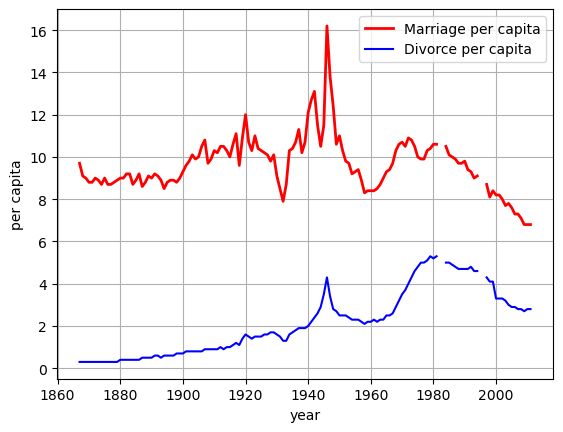

In [64]:
import matplotlib.pyplot as plt
lines = plt.plot(Marriage_df['Year'],Marriage_df['Marriages_per_1000'],Marriage_df['Year'],Marriage_df['Divorces_per_1000'])
plt.ylabel("per capita")
plt.xlabel('year')
plt.rcParams["figure.figsize"] = [15, 12]
plt.rcParams["figure.autolayout"] = True
plt.setp(lines[0], color='r', linewidth=2.0 ,label="Marriage per capita")
plt.setp(lines[1], color='b', label="Divorce per capita")
plt.legend(loc='upper right')
plt.grid()

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.

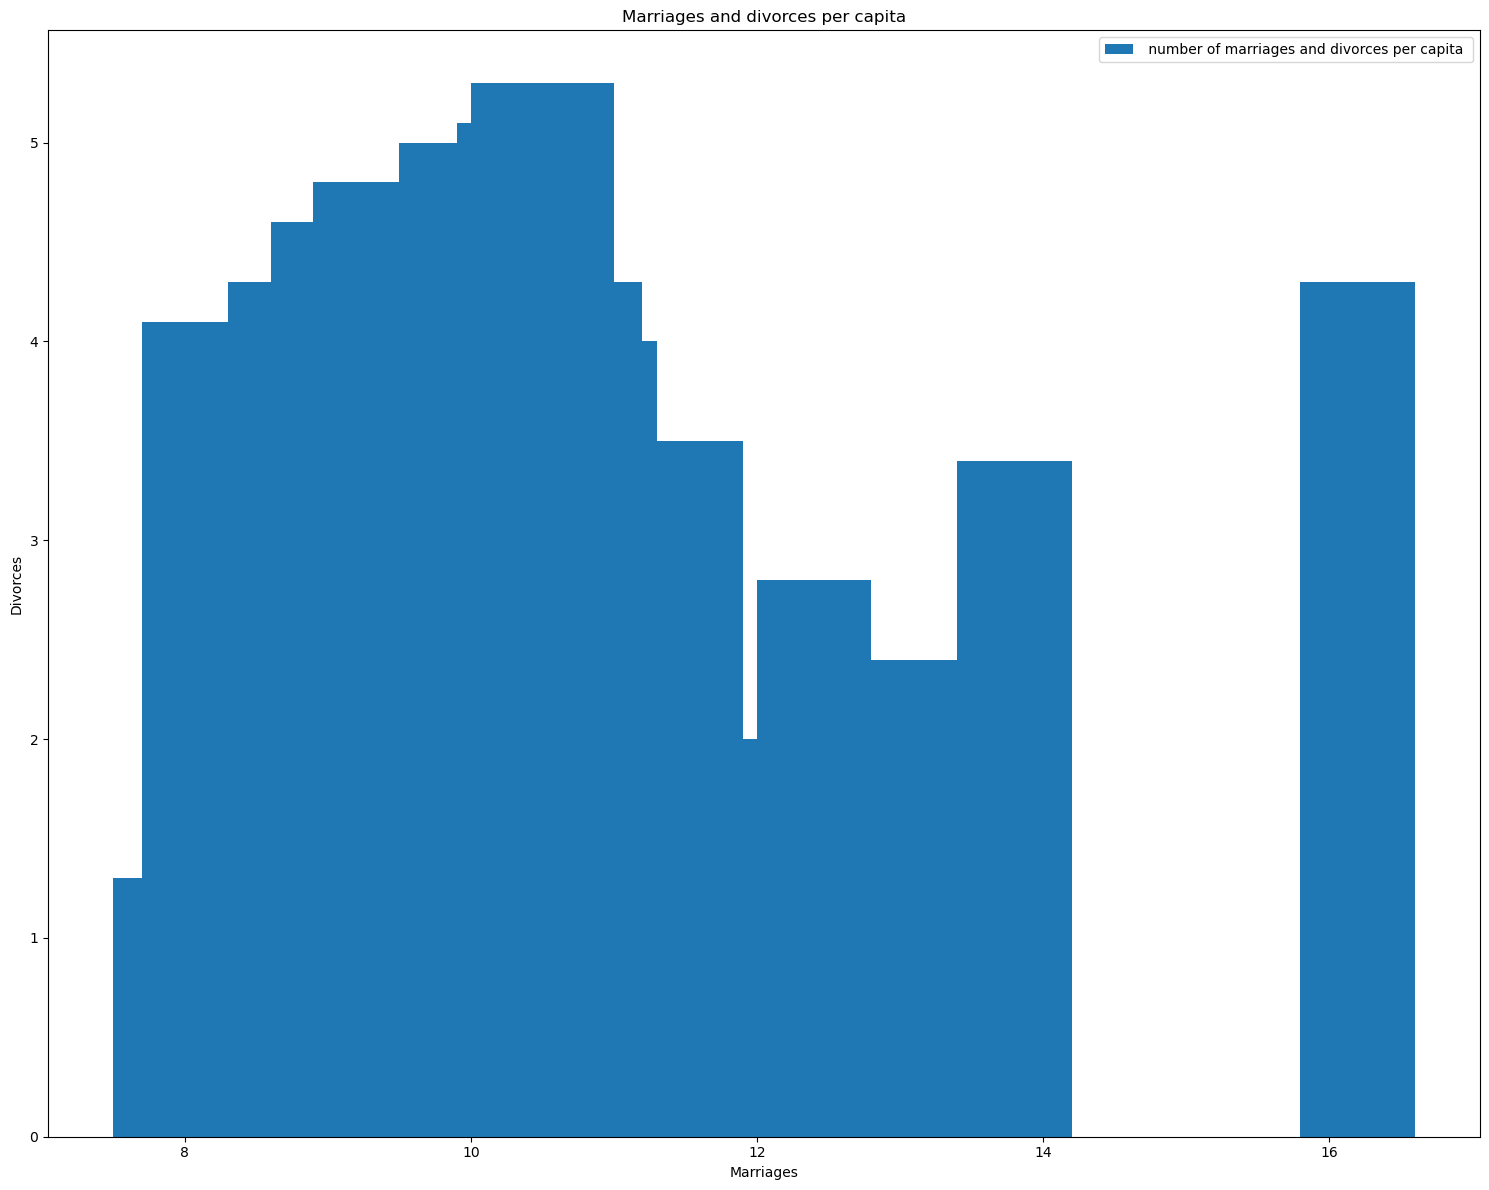

In [65]:
import matplotlib.pyplot as plt

df_first= Marriage_df[Marriage_df['Year'] >= 1900 ]
df_second = Marriage_df[Marriage_df['Year'] <=2000 ]
df_second.head()

fig= plt.figure(figsize=(15,12))
plt.bar(df_second['Marriages_per_1000'],df_second['Divorces_per_1000'], label=" number of marriages and divorces per capita ")
plt.legend()

plt.xlabel('Marriages')
plt.ylabel('Divorces')
plt.title('Marriages and divorces per capita')

plt.show()


# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
Actor_kill_counts = pd.read_csv(r'actor_kill_counts.csv')

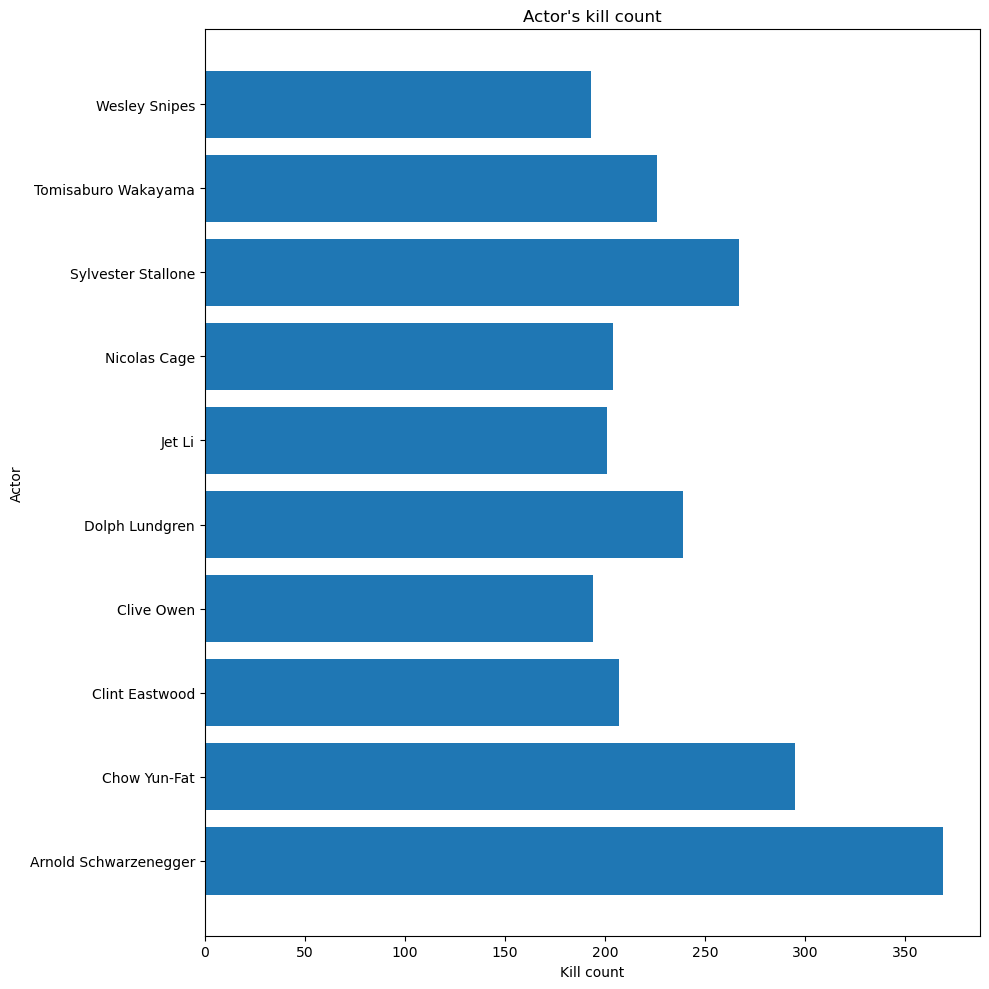

In [68]:
fig= plt.figure(figsize=(10,10))
plt.barh(Actor_kill_counts['Actor'], Actor_kill_counts['Count'])
plt.ylabel("Actor")
plt.xlabel("Kill count")
plt.title("Actor's kill count")
plt.show()

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [69]:
romanData = pd.read_csv(r'roman-emperor-reigns.csv')

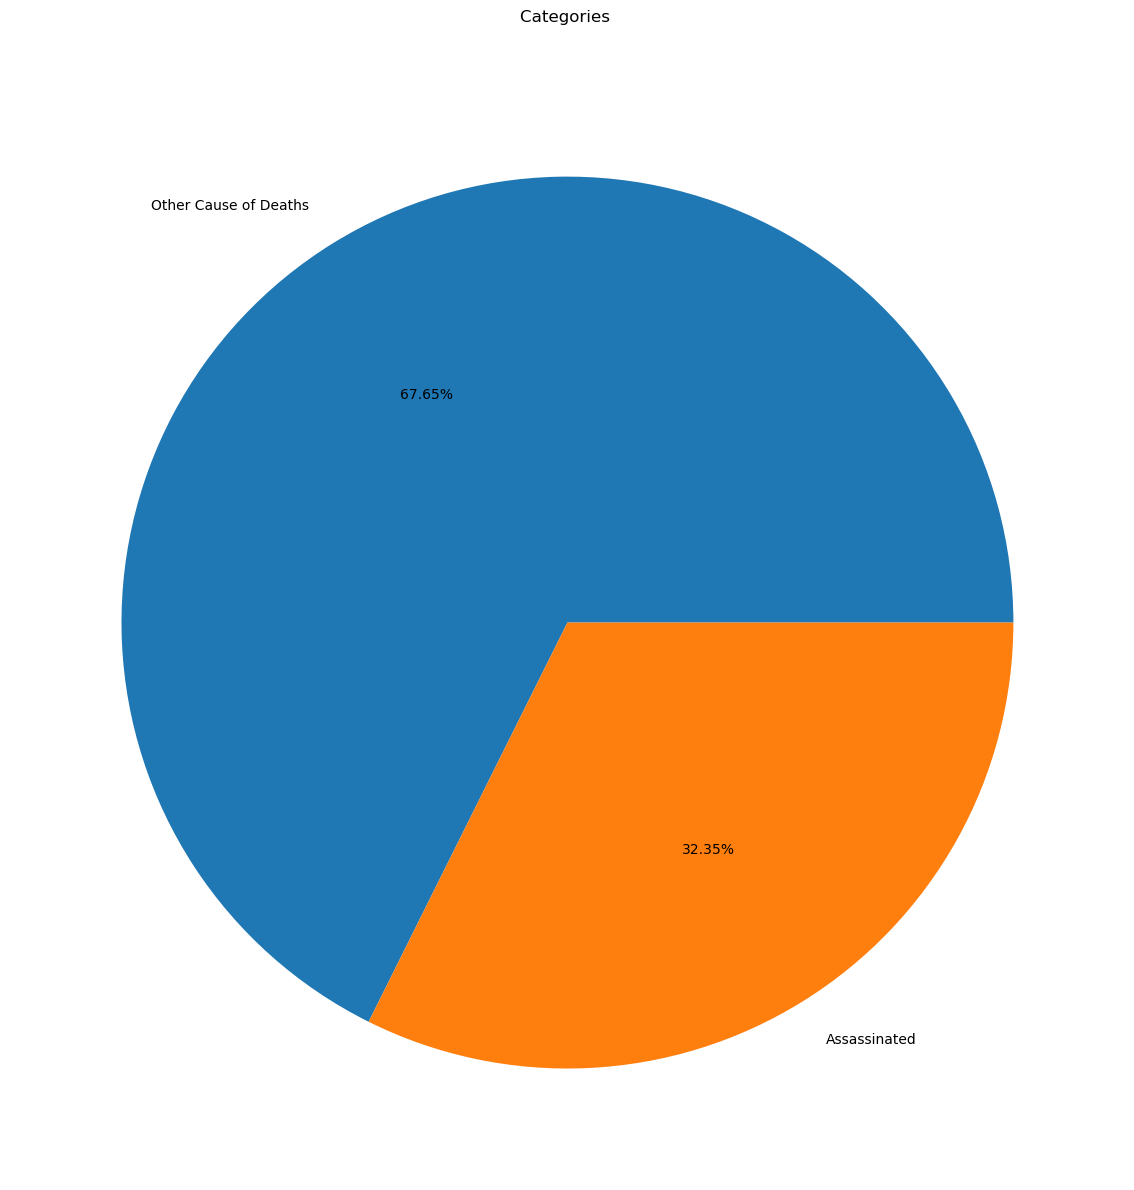

In [70]:
lowerData= romanData.where(romanData.Cause_of_Death=="Assassinated").Cause_of_Death.count()

remaining= romanData.Cause_of_Death.count()-lowerData

label=["Other Cause of Deaths","Assassinated"]
plt.pie([remaining,lowerData],labels=label,autopct='%.2f%%')
plt.title("Categories \n\n")


plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

In [71]:
arcade_revenue = pd.read_csv(r'arcade-revenue-vs-cs-doctorates.csv')

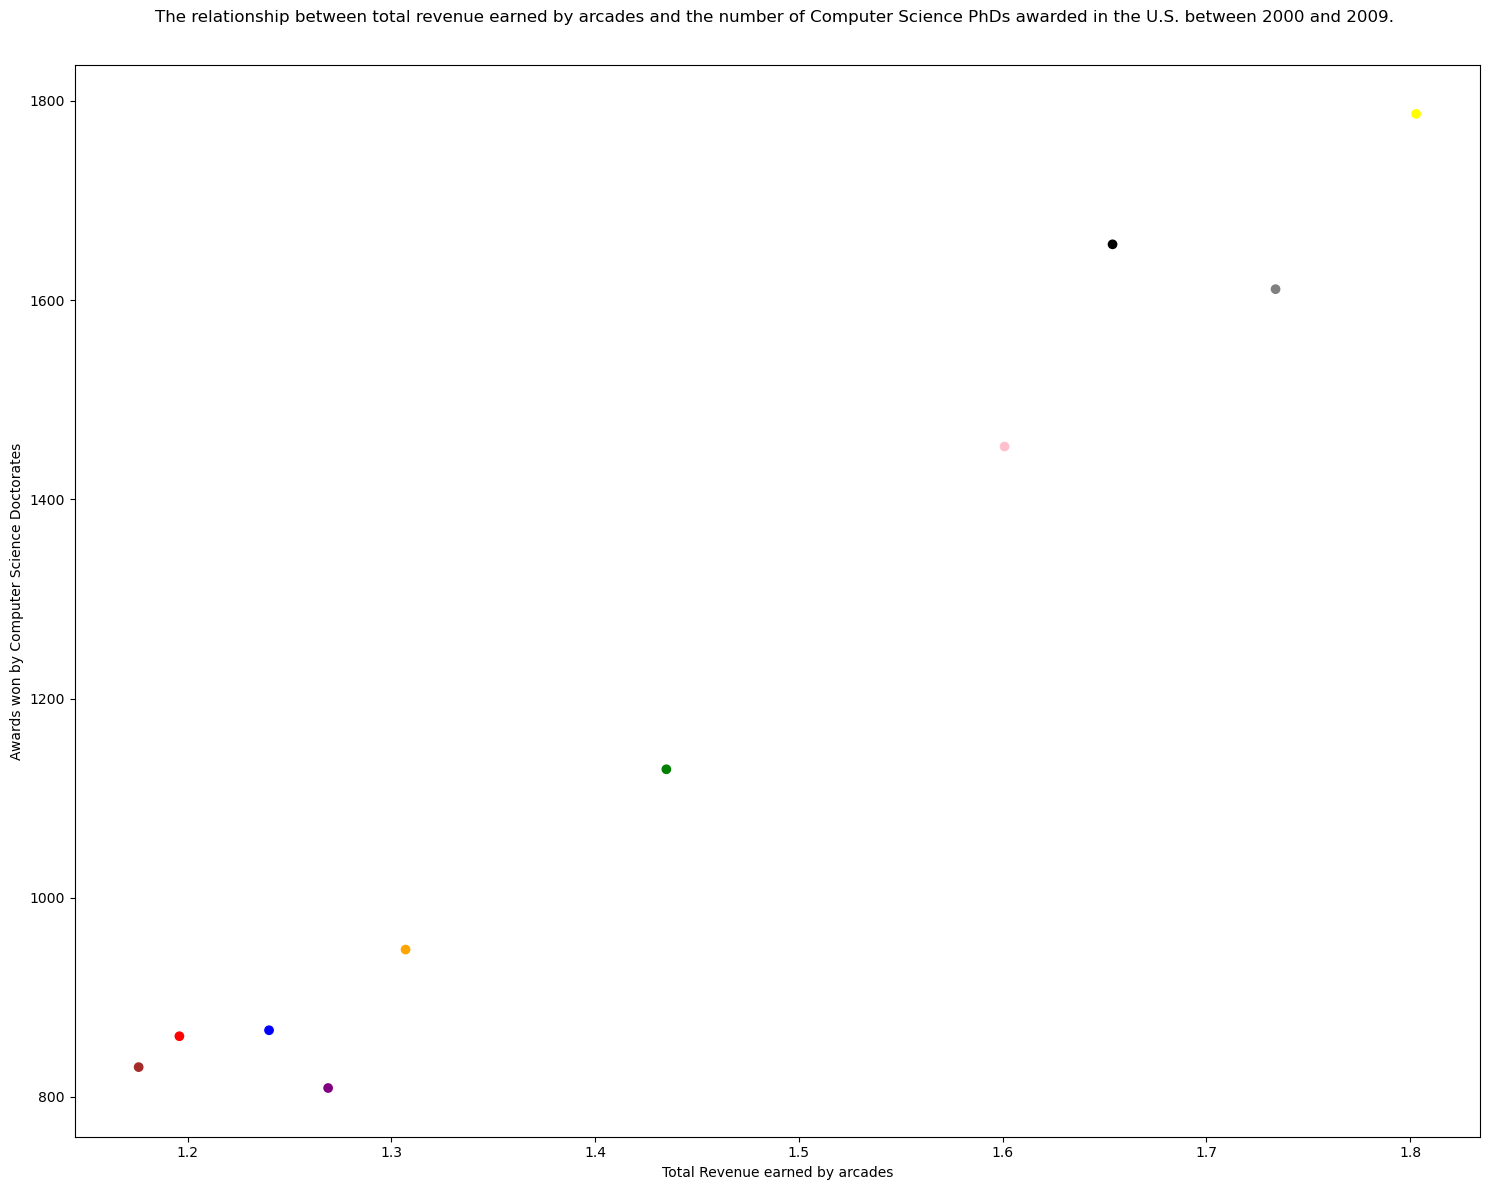

In [72]:
Years=arcade_revenue.Year
Arcade= arcade_revenue['Total Arcade Revenue (billions)']
PhD=arcade_revenue['Computer Science Doctorates Awarded (US)']


colors=["Red","Brown","Purple","Blue","Orange","Green","Pink","Black","Yellow","Gray"]
plt.scatter(Arcade,PhD,color=colors)

plt.xlabel("Total Revenue earned by arcades")
plt.ylabel("Awards won by Computer Science Doctorates")
plt.title("The relationship between total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. \n\n")
plt.show()